In [85]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import pandas as pd

Mengimpor pustaka pandas dengan alias pd.
Pandas digunakan untuk manipulasi dan analisis data dalam bentuk DataFrame dan Series.

import numpy as np

Mengimpor pustaka NumPy dengan alias np.
NumPy menyediakan fungsi untuk operasi numerik, termasuk array multidimensi dan fungsi matematika seperti logaritma, sinus, dan eksponensial.

import statsmodels.api as sm

Mengimpor pustaka statsmodels dengan alias sm.
Digunakan untuk analisis statistik, termasuk regresi linear, ANOVA, uji hipotesis, dan model ekonomi.

import matplotlib.pyplot as plt

Mengimpor pustaka matplotlib.pyplot dengan alias plt.
Matplotlib digunakan untuk membuat grafik dan visualisasi data, seperti scatter plot, histogram, dan line plot.

import seaborn as sns

Mengimpor pustaka seaborn dengan alias sns.
Seaborn adalah pustaka visualisasi berbasis matplotlib yang menyediakan grafik statistik yang lebih menarik dan mudah digunakan, seperti heatmap, boxplot, dan violin plot.

from scipy import stats

Mengimpor modul stats dari pustaka scipy.
SciPy digunakan untuk statistik dan komputasi ilmiah, termasuk distribusi probabilitas, pengujian hipotesis (seperti uji-t, ANOVA, dan uji korelasi Pearson).

In [87]:
# Membaca data CSV, specifying the delimiter as semicolon
data = pd.read_csv('/content/Experience-Salary.csv')
# Melihat 5 data pertama
print(data.head())

   exp(in months)  salary(in thousands)
0       18.290293             16.521825
1       17.023407             11.666234
2       26.343613             23.167255
3       19.105834             20.877145
4       27.742516             23.166236


data = pd.read_csv('/content/Experience-Salary.csv')

pd.read_csv() adalah fungsi dari pandas untuk membaca file CSV (Comma-Separated Values).

'/content/Experience-Salary.csv' adalah path file yang akan dibaca.

Jika file CSV menggunakan delimiter (pemisah) selain koma (,), seperti semicolon (;), maka perlu ditambahkan argumen delimiter=';'. Namun, dalam kode ini tidak ada argumen tersebut, sehingga diasumsikan file menggunakan koma sebagai pemisah.

Jika pemisahnya adalah semicolon (;), maka seharusnya ditulis seperti ini:

data = pd.read_csv('/content/Experience-Salary.csv', delimiter=';')
print(data.head())

data.head()

menampilkan 5 baris pertama dari DataFrame.
Ini berguna untuk melihat struktur awal data, seperti nama kolom, tipe data, dan sampel nilai.
Contoh Output
Misalkan file Experience-Salary.csv berisi informasi tentang pengalaman kerja dan gaji, hasilnya bisa seperti ini:

  exp(in months)  salary(in thousands)
0       18.290293             16.521825
1       17.023407             11.666234
2       26.343613             23.167255
3       19.105834             20.877145
4       27.742516             23.166236

In [88]:
data.rename(columns={'exp(in months)': 'X', 'salary(in thousands)': 'Y' }, inplace=True)
print(data)

             X          Y
0    18.290293  16.521825
1    17.023407  11.666234
2    26.343613  23.167255
3    19.105834  20.877145
4    27.742516  23.166236
..         ...        ...
995  22.161741  24.666502
996  32.266497  24.160270
997  17.039030  19.903797
998  25.222124  21.974413
999  16.418028  19.634787

[1000 rows x 2 columns]


data.rename(columns={...})

Fungsi rename() digunakan untuk mengganti nama kolom dalam DataFrame.

columns={'exp(in months)': 'X', 'salary(in thousands)': 'Y'}
→ Mengubah nama kolom:

exp(in months) → menjadi X (mewakili pengalaman kerja dalam bulan).

salary(in thousands) → menjadi Y (mewakili gaji dalam ribuan).

inplace=True

inplace=True berarti perubahan akan langsung diterapkan pada data tanpa perlu membuat salinan baru.

print(data)

Mencetak DataFrame setelah nama kolom diubah.

In [89]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()
print(correlation_matrix)

          X         Y
X  1.000000  0.810969
Y  0.810969  1.000000


data.corr()

Fungsi ini menghitung koefisien korelasi Pearson antara semua pasangan kolom numerik dalam DataFrame data.
Korelasi mengukur hubungan linear antara dua variabel dengan nilai antara -1 hingga 1:

+1 → Korelasi positif sempurna (ketika satu variabel naik, yang lain juga naik).

-1 → Korelasi negatif sempurna (ketika satu variabel naik, yang lain turun).

0 → Tidak ada hubungan linear antara variabel.

Menyimpan hasil ke correlation_matrix

Variabel correlation_matrix menyimpan DataFrame dengan nilai korelasi antara semua kolom numerik dalam data.

print(correlation_matrix)

Menampilkan matriks korelasi dalam bentuk tabel.

Interpretasi hasil:

X ke X = 1.000000 → Korelasi antara variabel X dengan dirinya sendiri adalah 1 (selalu sempurna).

Y ke Y = 1.000000 → Korelasi antara variabel Y dengan dirinya sendiri juga 1 (selalu sempurna).

X ke Y = 0.810969 → Korelasi antara X (pengalaman kerja) dan Y (gaji) adalah 0.81, menunjukkan hubungan positif yang kuat.

Artinya, semakin tinggi pengalaman kerja, semakin tinggi pula gaji secara umum.

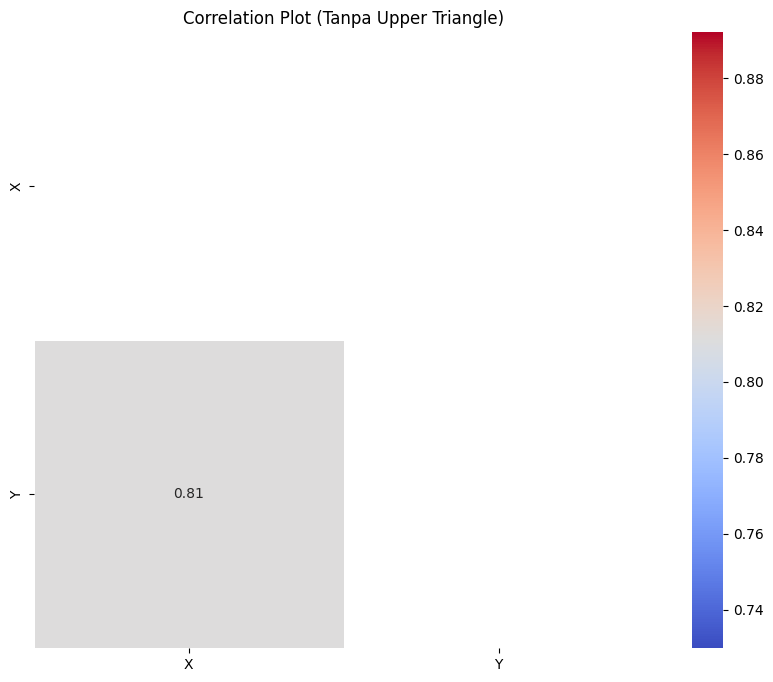

In [90]:
# Membuat mask untuk upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap tanpa upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot (Tanpa Upper Triangle)')
plt.show()

1. Membuat Mask untuk Upper Triangle

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

np.ones_like(correlation_matrix, dtype=bool)
Membuat array dengan ukuran yang sama dengan correlation_matrix, diisi dengan True.

dtype=bool memastikan array berisi nilai True/False.

np.triu()
Mengambil upper triangle (segitiga atas) dari matriks.
Elemen di atas diagonal utama akan bernilai True, sedangkan elemen di bawah diagonal akan False.

Tujuan:
Mask ini akan digunakan untuk menyembunyikan bagian upper triangle pada heatmap.

2. Membuat Heatmap Tanpa Upper Triangle

plt.figure(figsize=(10, 8))
Membuat figure dengan ukuran 10x8 inci untuk visualisasi yang lebih jelas.

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)

correlation_matrix → Menggunakan matriks korelasi sebagai data.

mask=mask → Menyembunyikan upper triangle menggunakan mask.

annot=True → Menampilkan nilai korelasi di dalam setiap sel.

cmap='coolwarm' → Menggunakan skema warna Coolwarm (biru ke merah).

Biru → Korelasi negatif.

Merah → Korelasi positif.

linewidths=0.5 → Menambahkan garis pemisah antar sel agar lebih jelas.

3. Menampilkan Plot

plt.title('Correlation Plot (Tanpa Upper Triangle)')
plt.show()

Menambahkan judul: 'Correlation Plot (Tanpa Upper Triangle)'.

plt.show(): Menampilkan heatmap.

Hasil yang Dihasilkan

Heatmap akan menampilkan hanya bagian lower triangle dari matriks korelasi.

Bagian upper triangle akan dikosongkan (warna putih).

Nilai korelasi akan muncul di dalam sel.

<Axes: xlabel='X', ylabel='Y'>

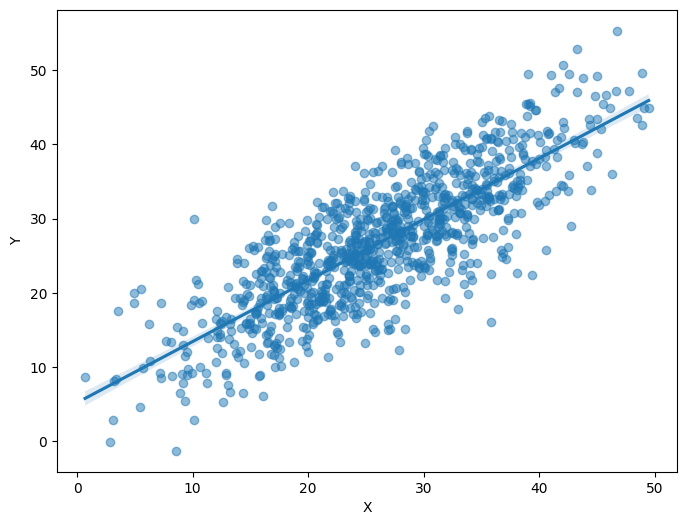

In [91]:
# Plot scatterplot dengan regresi
plt.figure(figsize=(8, 6))
sns.regplot(x="X", y="Y", data=data, scatter_kws={"alpha": 0.5})

1. Membuat Figure

plt.figure(figsize=(8, 6))

Membuat kanvas (figure) dengan ukuran 8x6 inci.

Ini memastikan bahwa plot memiliki ukuran yang cukup besar dan mudah dibaca.

2. Membuat Scatter Plot dengan Regresi

sns.regplot(x="X", y="Y", data=data, scatter_kws={"alpha": 0.5})

a. Scatter Plot

(scatter_kws={"alpha": 0.5})
scatter_kws={"alpha": 0.5} mengatur opacity (transparansi) titik scatter.

Alpha = 0.5 → Titik-titik pada scatter plot lebih transparan agar tidak terlalu menumpuk.

b. Regresi Linear

sns.regplot(x="X", y="Y", data=data)

x="X" → Menggunakan X (pengalaman kerja dalam bulan) sebagai variabel independen.

y="Y" → Menggunakan Y (gaji dalam ribuan) sebagai variabel dependen.

data=data → Menggunakan dataset data.

Secara otomatis, Seaborn akan menghitung dan menggambar garis regresi linear berdasarkan hubungan antara X dan Y.

Hasil Plot

Scatter plot menunjukkan hubungan antara pengalaman kerja (X) dan gaji (Y).

Garis regresi linear menunjukkan tren linear terbaik yang mendekati data.

Jika titik-titik mengikuti garis regresi dengan baik, ini menunjukkan hubungan linear yang kuat antara pengalaman kerja dan gaji.

In [92]:
from sklearn.linear_model import LinearRegression

Kode di atas mengimpor LinearRegression dari pustaka scikit-learn (sklearn). LinearRegression adalah model regresi linear yang digunakan untuk memprediksi nilai variabel dependen (Y) berdasarkan variabel independen (X).

In [93]:
# Pisahkan variabel independen (X) dan dependen (Y)
X = data[["X"]]  # Perlu diubah ke bentuk 2D
Y = data["Y"]


# Menambahkan konstanta ke model (intercept)
X = sm.add_constant(X)

Kode berikut digunakan untuk memisahkan variabel independen (X) dan dependen (Y) serta menambahkan konstanta (intercept) ke dalam model regresi menggunakan statsmodels.

In [94]:
# Membuat model regresi linear
model = sm.OLS(Y, X).fit()

# Melihat ringkasan model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1917.
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.51e-234
Time:                        05:37:02   Log-Likelihood:                -3062.3
No. Observations:                1000   AIC:                             6129.
Df Residuals:                     998   BIC:                             6138.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1987      0.518     10.034      0.000       4.182       6.215
X              0.8228      0.019     43.787      0.000       0.786       0.860
==============================================================================
Omnibus:                        3.580   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                3.592
Skew:                          -0.146   Prob(JB):                        0.166
Kurtosis:                       2.972   Cond. No.                         87.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Kode berikut digunakan untuk membuat model regresi linear menggunakan Ordinary Least Squares (OLS) dari statsmodels dan melihat ringkasan hasil regresi.

Ringkasan ini menampilkan hasil analisis regresi, termasuk:

*  Koefisien regresi (slope dan intersep)
*  R-squared (keakuratan model)
*  P-value (signifikansi statistik)
*  Statistik F dan t-test
*  Standard error dan confidence interval


In [95]:
print(model)

model adalah objek dari statsmodels.regressionlinear_model.RegressionResultsWrapper.

Ini adalah wrapper (pembungkus) yang berisi semua hasil regresi dari sm.OLS(Y, X).fit().

Jika Anda hanya menggunakan print(model), Python tidak akan menampilkan ringkasan regresi, melainkan hanya mengembalikan informasi tentang objek tersebut.

In [96]:
prediksi = model.predict(X)
prediksi

,0
0,20.248825
1,19.206372
2,26.875473
3,20.919890
4,28.026556
...,...
995,23.434433
996,31.749098
997,19.219227
998,25.952659


model.predict(X)

Ini menggunakan model regresi linear yang sudah kita buat (model) untuk menghitung nilai prediksi dari variabel dependen (Y) berdasarkan variabel independen (X).
Dengan kata lain, model akan menggunakan persamaan regresi:
𝑌=𝛽0+𝛽1𝑋
di mana:
𝛽0 adalah intersep (konstanta).

𝛽1 adalah koefisien regresi untuk X.

X adalah variabel independen (pengalaman kerja dalam bulan).

Y adalah gaji yang diprediksi.

Output prediksi

prediksi adalah serangkaian nilai gaji yang diprediksi berdasarkan pengalaman kerja (X).

Outputnya berbentuk pandas Series, yang ukurannya sama dengan jumlah baris pada data.

In [97]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

from sklearn.linear_model import LinearRegression

Mengimpor LinearRegression dari pustaka scikit-learn, yang digunakan untuk membangun model regresi linear.

lin_reg = LinearRegression()

Membuat objek model regresi linear dengan nama lin_reg.
Model ini belum dilatih dan belum memiliki parameter (intercept dan koefisien).

lin_reg.fit(X, Y)

Melatih model dengan data yang diberikan.
X → Variabel independen (pengalaman kerja dalam bulan).
Y → Variabel dependen (gaji dalam ribuan).

Model akan menghitung koefisien regresi (slope) dan intersep (intercept) berdasarkan metode OLS (Ordinary Least Squares).


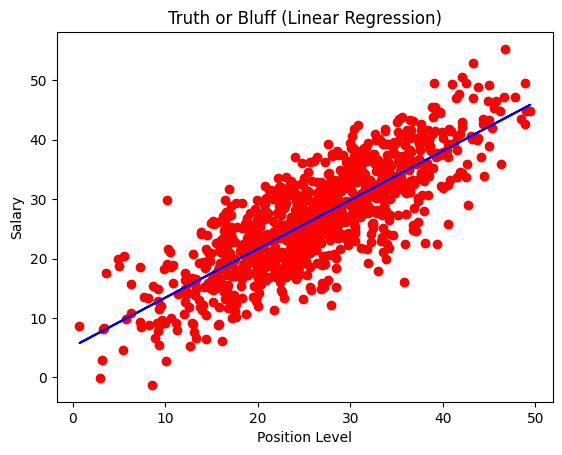

In [102]:
plt.scatter(X.X, Y, color = 'red')
plt.plot(X.X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Kode ini digunakan untuk memvisualisasikan hasil regresi linear dengan scatter plot (titik data asli) dan garis regresi (prediksi model).

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Kode ini mengimpor tiga metrik evaluasi dari scikit-learn untuk mengukur performa model regresi.



1.   Mean Squared Error (MSE) → mean_squared_error(y_true, y_pred)

Mengukur rata-rata selisih kuadrat antara nilai aktual (y_true) dan prediksi (y_pred).

2.   Mean Absolute Error (MAE) → mean_absolute_error(y_true, y_pred)

Mengukur rata-rata selisih absolut antara nilai aktual dan prediksi.

3.   R-squared (R² Score) → r2_score(y_true, y_pred)

Mengukur seberapa baik model menjelaskan variabilitas data.



In [104]:
# Evaluasi model
mse = mean_squared_error(Y, prediksi)
mae = mean_absolute_error(Y, prediksi)
r2 = r2_score(Y, prediksi)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 26.7535
Mean Absolute Error (MAE): 4.0870
R-squared (R²): 0.6577


Kode ini menghitung tiga metrik evaluasi untuk regresi linear: Mean Squared Error (MSE), Mean Absolute Error (MAE), dan R-squared (R² Score), lalu mencetak hasilnya.

In [105]:
from sklearn.preprocessing import PolynomialFeatures

Kode ini mengimpor PolynomialFeatures dari pustaka scikit-learn, yang digunakan untuk membuat fitur polinomial dari data input. Ini sering digunakan dalam Regresi Polinomial, yang merupakan bentuk lanjutan dari regresi linear.

In [110]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression()

Kode ini digunakan untuk membuat model Regresi Polinomial dengan derajat 2 (kuadratik).

PolynomialFeatures(degree=2) → Membuat objek untuk mengubah fitur X menjadi bentuk polinomial dengan derajat 2.

fit_transform(X) → Mengubah X menjadi fitur polinomialnya.

LinearRegression() → Membuat model Regresi Linear biasa.

fit(X_poly, Y) → Melatih model dengan X_poly (fitur polinomial) dan Y (target/label).

Jadi, meskipun kita menggunakan LinearRegression(), karena inputnya adalah X yang sudah dikonversi ke bentuk polinomial, hasilnya menjadi Regresi Polinomial.

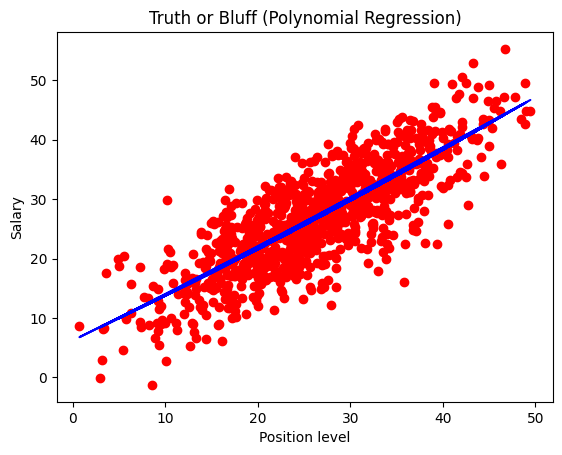

In [111]:
plt.scatter(X.X, Y, color = 'red')
plt.plot(X.X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Kode ini digunakan untuk memvisualisasikan hasil Regresi Polinomial dengan data asli dan prediksi model.

In [112]:
Y_poly = lin_reg_2.predict(X_poly)
Y_poly

array([20.22571581, 19.22060165, 26.74452053, 20.87567444, 27.89968636,
       31.17994924, 16.9898847 , 29.72194939, 32.16727582, 27.18159256,
       39.63202637, 31.62656   , 33.77783482, 27.71129444, 26.2656225 ,
       35.65019482, 24.61823063, 24.9006122 , 18.51812334, 24.21598554,
       26.15832219, 27.78101833, 23.94680378, 21.63235776, 25.62749022,
       33.08045393, 42.22243862, 21.25968887, 20.40151042, 31.07095864,
       31.21973658, 20.25420929, 22.67445486, 27.21146706, 33.94965967,
       27.55880367, 22.68744863, 29.59594248, 18.21427923, 17.15438883,
       28.52879768, 23.10385437, 14.20299945, 19.29906455, 35.27461761,
       21.21577454, 33.15201831, 41.17652923, 21.97320413,  9.90936786,
       22.53420444, 33.48415286, 27.33706429, 32.91464982, 28.63665684,
       25.89720086, 27.5646208 , 20.48382286, 31.35290375, 33.66769236,
       19.24962495, 26.25137885, 33.27904907, 22.35560544, 15.30118072,
       15.60590609, 29.22587866, 30.78855018, 24.79562395, 11.69

Kode ini digunakan untuk membuat prediksi nilai Y (salary) berdasarkan model Regresi Polinomial yang sudah dibuat.

In [113]:
# Evaluasi model
mse_poly = mean_squared_error(Y, Y_poly)
mae_poly = mean_absolute_error(Y, Y_poly)
r2_poly = r2_score(Y, Y_poly)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE Poly): {mse_poly:.4f}")
print(f"Mean Absolute Error (MAE Poly): {mae_poly:.4f}")
print(f"R-squared (R² Poly): {r2_poly:.4f}")

Mean Squared Error (MSE Poly): 26.7238
Mean Absolute Error (MAE Poly): 4.0883
R-squared (R² Poly): 0.6581


Kode ini digunakan untuk mengevaluasi performa model Regresi Polinomial dengan menghitung tiga metrik evaluasi:

1. Mean Squared Error (MSE)

2. Mean Absolute Error (MAE)

3. R-squared (R²)

mean_squared_error(Y, Y_poly)

→ Menghitung Mean Squared Error (MSE), yaitu rata-rata kuadrat selisih antara nilai aktual (Y) dan nilai prediksi (Y_poly).

mean_absolute_error(Y, Y_poly)

→ Menghitung Mean Absolute Error (MAE), yaitu rata-rata nilai absolut dari selisih antara nilai aktual (Y) dan nilai prediksi (Y_poly).

r2_score(Y, Y_poly)

→ Menghitung R-squared (R²), yaitu seberapa baik model menjelaskan variasi data (Semakin mendekati 1, semakin baik modelnya).

* Menampilkan nilai MSE, MAE, dan R² dengan format 4 angka di belakang koma.

* Hasil ini digunakan untuk membandingkan performa model polinomial dengan model regresi linear.

Interpretasi Hasil:

* MSE & MAE yang lebih kecil → Model lebih akurat.

* Nilai R² = 0.6581 menunjukkan bahwa model memiliki akurasi yang lumayan, tetapi belum cukup baik untuk prediksi yang sangat akurat.


